In [ ]:
Comcast is an American global telecommunication company. The firm has been providing terrible customer service.
They continue to fall short despite repeated promises to improve. Only last month (October 2016) the authority
fined them a $2.3 million, after receiving over 1000 consumer complaints.
The existing database will serve as a repository of public customer complaints filed against Comcast.
It will help to pin down what is wrong with Comcast's customer service.

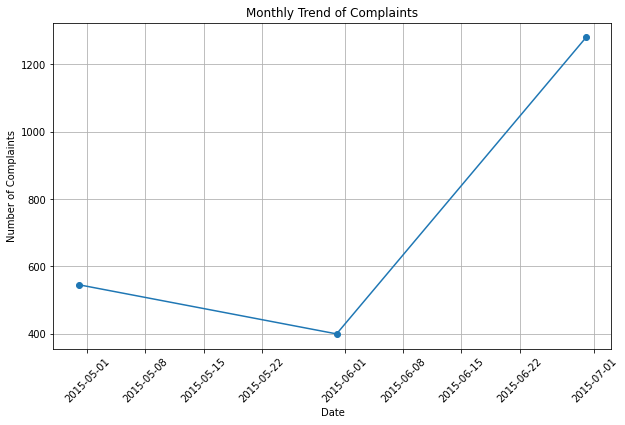

In [6]:
import pandas as pd
import matplotlib.pyplot as plt
data = pd.read_csv('Comcast_telecom_complaints_data.csv')
data['Date'] = pd.to_datetime(data['Date'])
data.set_index('Date', inplace=True)
monthly_trend = data.resample('M')['Ticket #'].count()
plt.figure(figsize=(10, 6))
plt.plot(monthly_trend.index, monthly_trend.values, marker='o')
plt.xlabel('Date')
plt.ylabel('Number of Complaints')
plt.title('Monthly Trend of Complaints')
plt.grid(True)
plt.xticks(rotation=45)
plt.show()


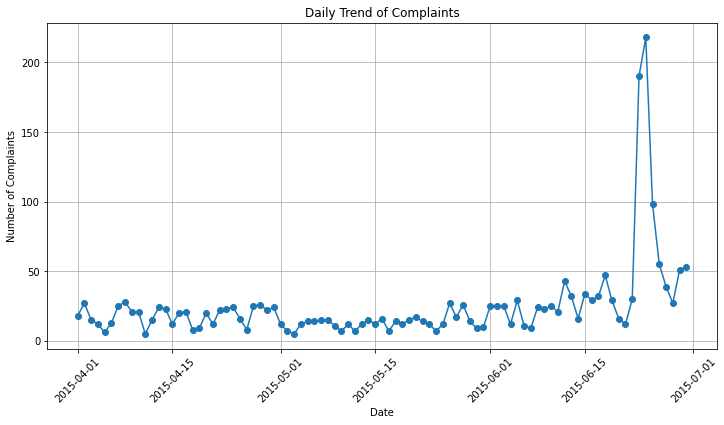

In [5]:
daily_trend = data.resample('D')['Ticket #'].count()
plt.figure(figsize=(12, 6))
plt.plot(daily_trend.index, daily_trend.values, marker='o')
plt.xlabel('Date')
plt.ylabel('Number of Complaints')
plt.title('Daily Trend of Complaints')
plt.grid(True)
plt.xticks(rotation=45)
plt.show()


In [7]:
complaint_freq_table = data['Customer Complaint'].value_counts().reset_index()
complaint_freq_table.columns = ['Complaint Type', 'Frequency']
complaint_freq_table

,Complaint Type,Frequency
0,Comcast,83
1,Comcast Internet,18
2,Comcast Data Cap,17
3,comcast,13
4,Comcast Data Caps,11
...,...,...
1836,Internet Service Provider Comcast harassing me...,1
1837,Comcast price,1
1838,Slow Internet/ Billing/ poor customer service ...,1
1839,speed/pricing,1


In [8]:
max_complaints = complaint_freq_table.head(5)
print("Top complaint types with their frequencies:")
print(max_complaints)

Top complaint types with their frequencies:
      Complaint Type  Frequency
0            Comcast         83
1   Comcast Internet         18
2   Comcast Data Cap         17
3            comcast         13
4  Comcast Data Caps         11


In [9]:
def categorize_status(row):
    if row['Status'] in ['Open', 'Pending']:
        return 'Open'
    elif row['Status'] in ['Closed', 'Solved']:
        return 'Closed'
    else:
        return 'Unknown'
data['Complaint Status'] = data.apply(categorize_status, axis=1)
print(data.head())

           Ticket #                                 Customer Complaint  \
Date                                                                     
2015-04-22   250635                      Comcast Cable Internet Speeds   
2015-04-08   223441       Payment disappear - service got disconnected   
2015-04-18   242732                                  Speed and Service   
2015-05-07   277946  Comcast Imposed a New Usage Cap of 300GB that ...   
2015-05-26   307175         Comcast not working and no service to boot   

           Date_month_year         Time        Received Via      City  \
Date                                                                    
2015-04-22      22-04-2015   3:53:50 PM  Customer Care Call  Abingdon   
2015-04-08      04-08-2015  10:22:56 AM            Internet   Acworth   
2015-04-18      18-04-2015   9:55:47 AM            Internet   Acworth   
2015-05-07      05-07-2015  11:59:35 AM            Internet   Acworth   
2015-05-26      26-05-2015   1:25:26 PM    

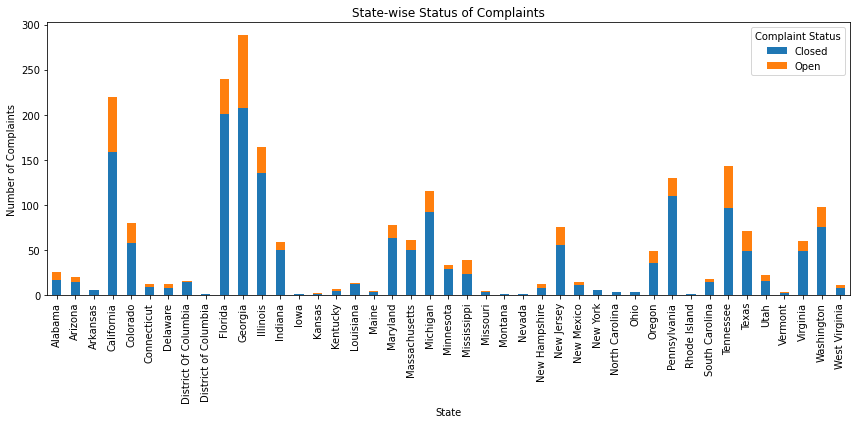

In [10]:
state_complaints = data.groupby(['State', 'Complaint Status'])['Customer Complaint'].count().unstack()
state_complaints.plot(kind='bar', stacked=True, figsize=(12, 6))
plt.xlabel('State')
plt.ylabel('Number of Complaints')
plt.title('State-wise Status of Complaints')
plt.legend(title='Complaint Status', loc='upper right', labels=['Closed', 'Open'])
plt.tight_layout()
plt.show()

In [12]:
state_complaints = data.groupby('State')['Customer Complaint'].count()
state_with_max_complaints = state_complaints.idxmax()
max_complaints_count = state_complaints.max()
print(f"The state with the maximum complaints is: {state_with_max_complaints}")
print(f"The total number of complaints in that state is: {max_complaints_count}")


The state with the maximum complaints is: Georgia
The total number of complaints in that state is: 288


In [13]:
state_complaints = data.groupby('State')['Complaint Status'].value_counts(normalize=True).unstack()
state_complaints['Unresolved Percentage'] = state_complaints['Open'] / (state_complaints['Open'] + state_complaints['Closed']) * 100
state_with_highest_unresolved_percentage = state_complaints['Unresolved Percentage'].idxmax()
highest_unresolved_percentage = state_complaints['Unresolved Percentage'].max()
print(f"The state with the highest percentage of unresolved complaints is: {state_with_highest_unresolved_percentage}")
print(f"The percentage of unresolved complaints in that state is: {highest_unresolved_percentage:.2f}%")


The state with the highest percentage of unresolved complaints is: Kansas
The percentage of unresolved complaints in that state is: 50.00%


In [14]:
resolved_complaints = data[data['Complaint Status'] == 'Closed']
total_resolved_complaints = resolved_complaints.shape[0]
resolved_complaints_by_channel = resolved_complaints['Received Via'].value_counts(normalize=True) * 100
print("Percentage of resolved complaints by communication channel:")
print(resolved_complaints_by_channel)


Percentage of resolved complaints by communication channel:
Customer Care Call    50.615114
Internet              49.384886
Name: Received Via, dtype: float64
